In [6]:
import numpy as np
from tensorflow.keras import layers, models, optimizers, metrics
from matplotlib import pyplot as plt
import wfdb
import os

In [20]:
with open("../ecg/ptb-diagnostic-ecg-database-1.0.0/RECORDS", "r") as f:
    records = [x.replace("\n", "") for x in f.readlines()]

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 60', 'sex: male', 'ECG date: 19/04/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): antero-septal', 'Former infarction (localization): no', 'Additional diagnoses: Hypercholesterinemia', 'Smoker: no', 'Number of coronary vessels involved: 2', 'Infarction date (acute): 20-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 28-Jan-91', 'Ventriculography: Limited hypokinesia anterior wall and apex', 'Chest X-ray: normal', 'Peripheral blood Pressure (syst/diast):  100/65 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast):   20/14 cmH2O', 'Pulmonary artery pressu

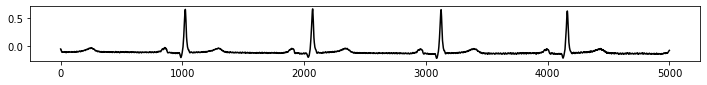

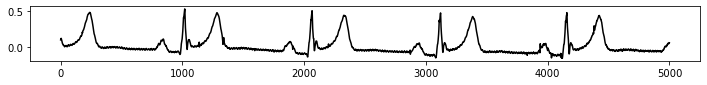

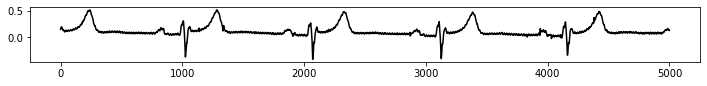

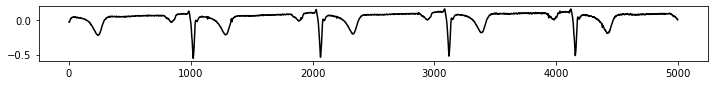

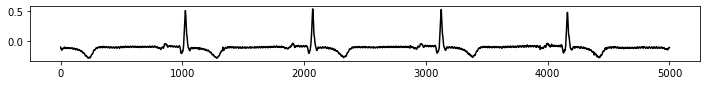

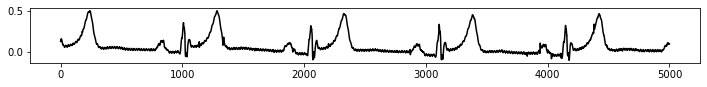

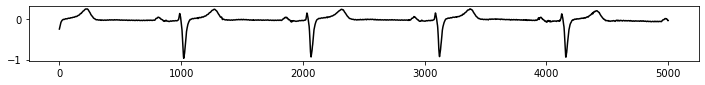

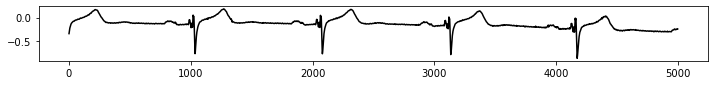

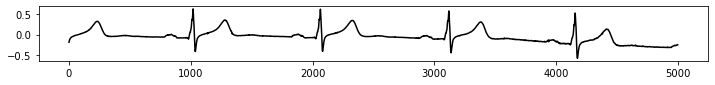

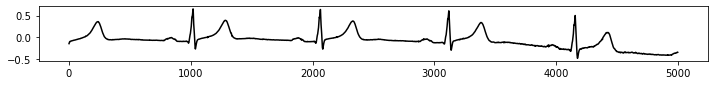

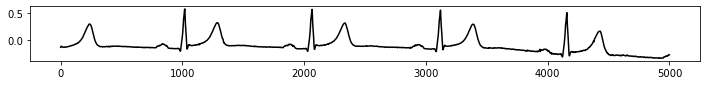

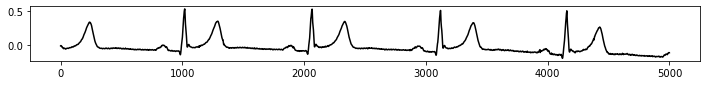

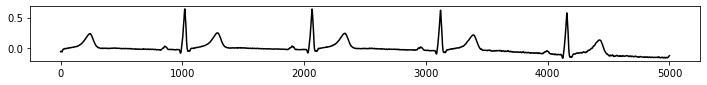

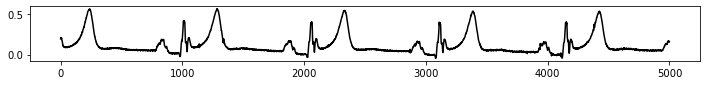

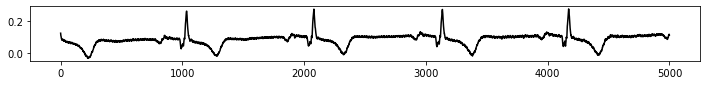

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 49', 'sex: male', 'ECG date: 23/01/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): antero-septal', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: yes', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): 22-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: not available', 'Chest X-ray: not available', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pres

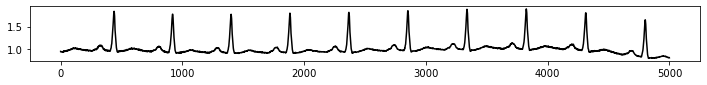

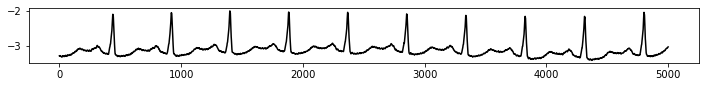

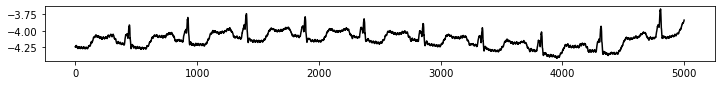

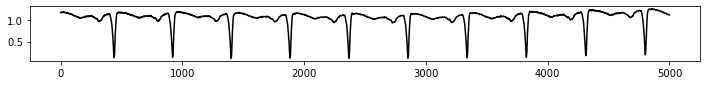

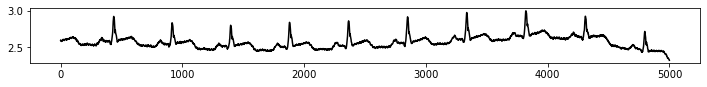

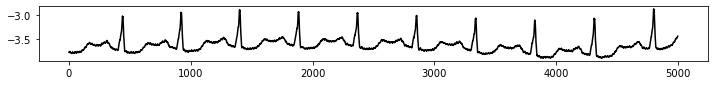

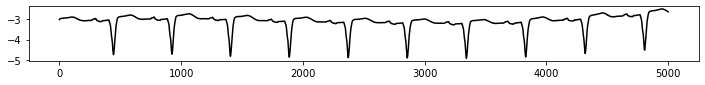

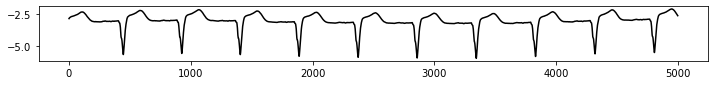

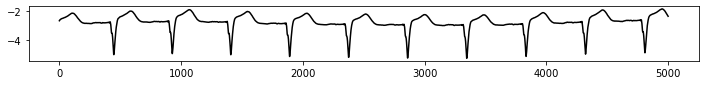

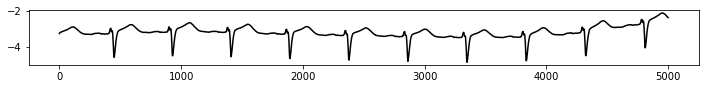

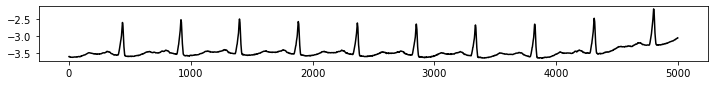

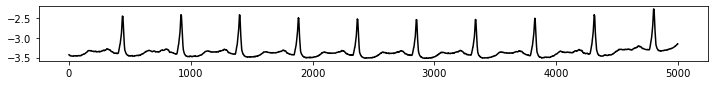

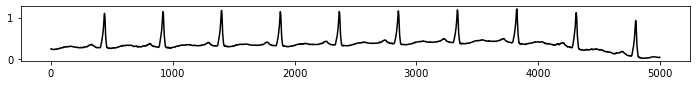

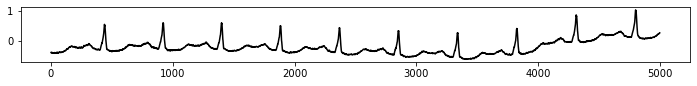

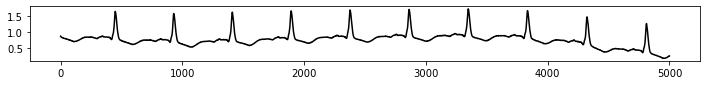

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 49', 'sex: male', 'ECG date: 28/01/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): antero-septal', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: yes', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): 22-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: not available', 'Chest X-ray: not available', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pres

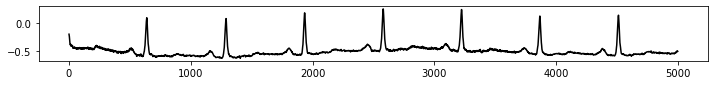

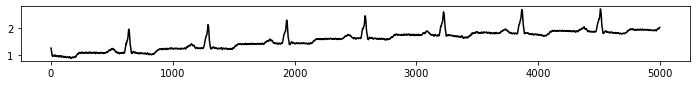

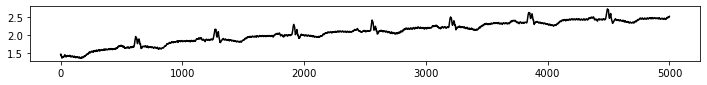

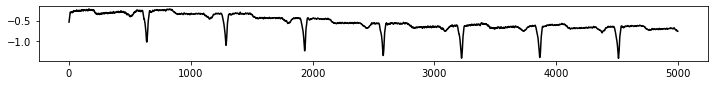

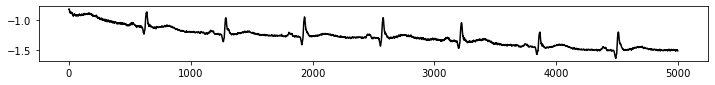

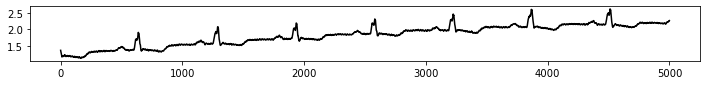

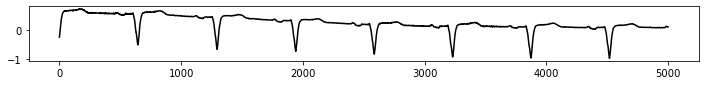

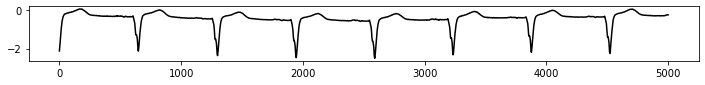

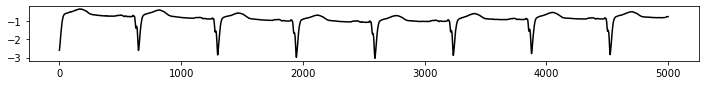

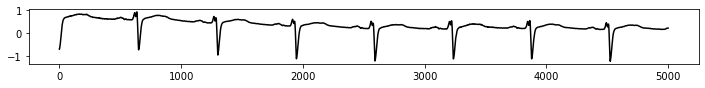

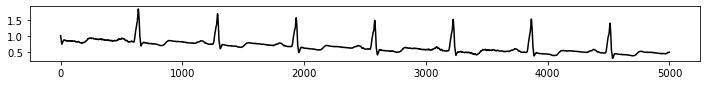

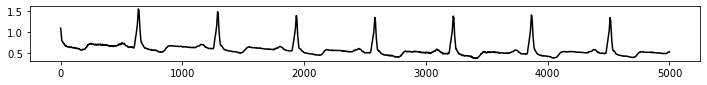

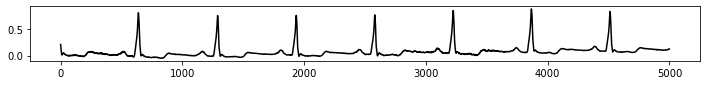

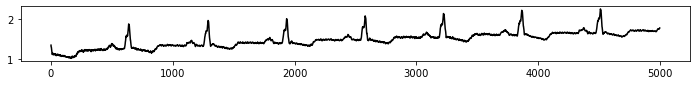

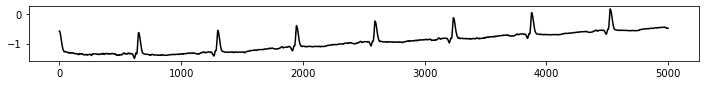

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 49', 'sex: male', 'ECG date: 30/01/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): antero-septal', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: yes', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): 22-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: not available', 'Chest X-ray: not available', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pres

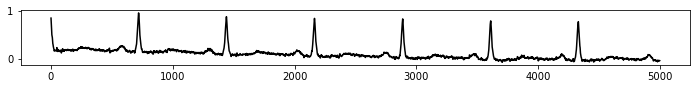

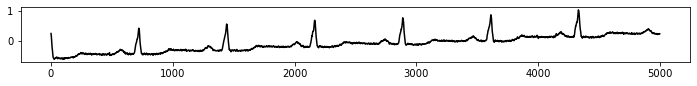

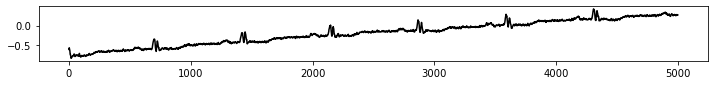

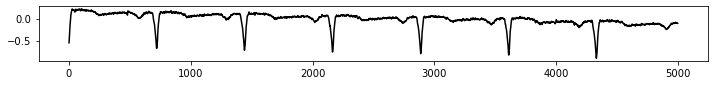

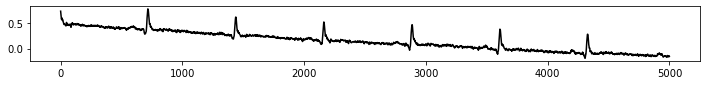

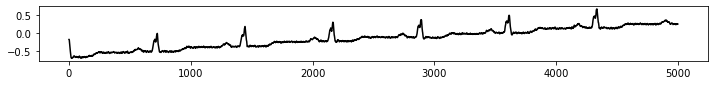

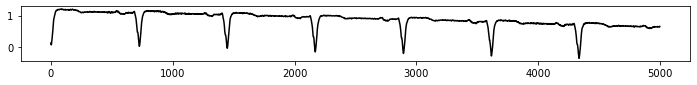

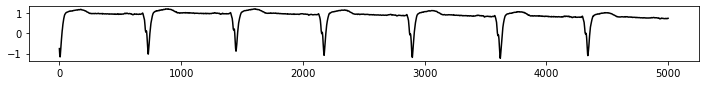

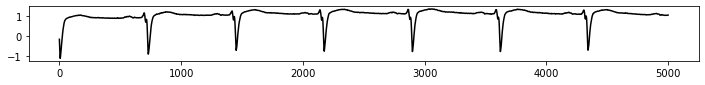

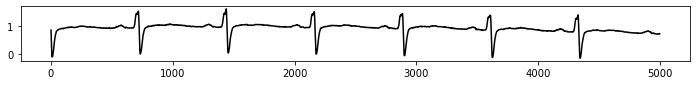

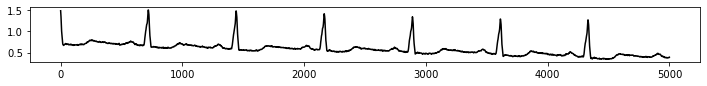

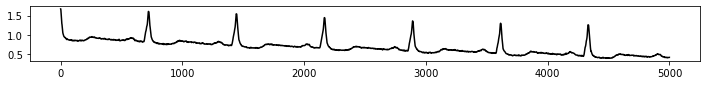

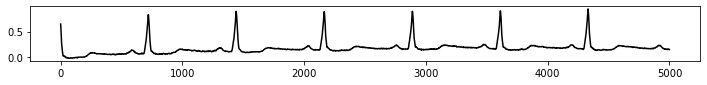

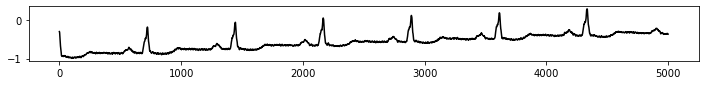

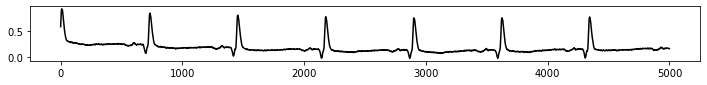

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 49', 'sex: male', 'ECG date: 19/04/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): antero-septal', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: yes', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): 22-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: not available', 'Chest X-ray: not available', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pres

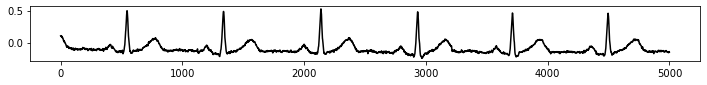

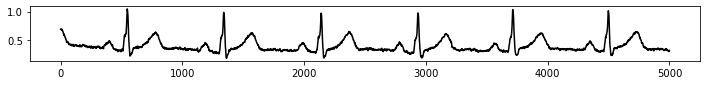

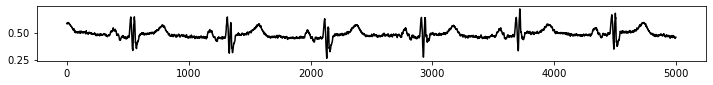

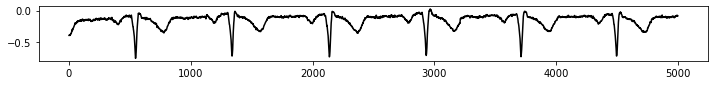

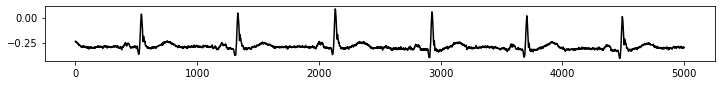

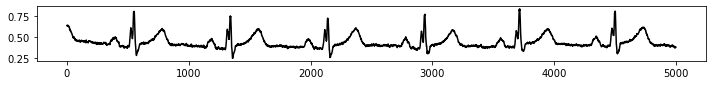

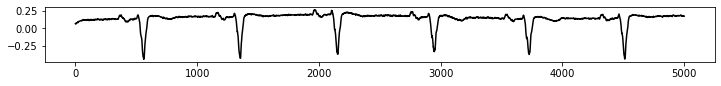

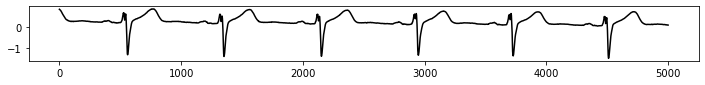

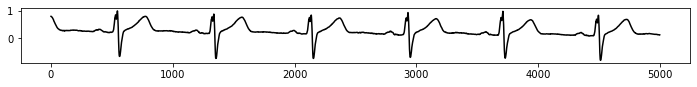

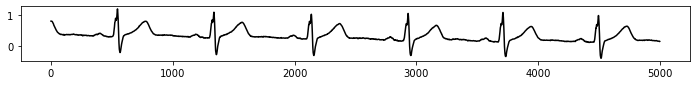

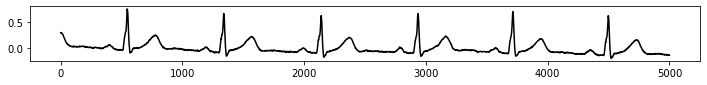

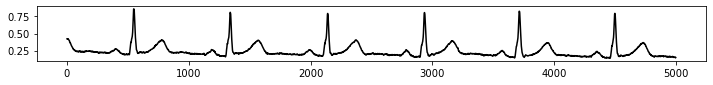

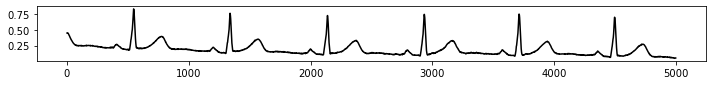

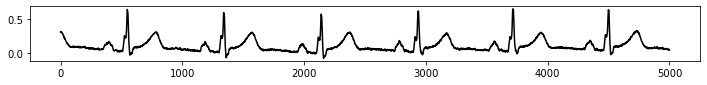

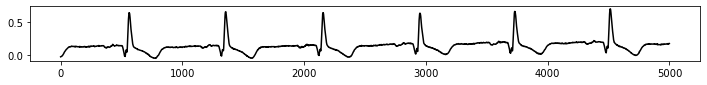

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 40', 'sex: male', 'ECG date: 23/01/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): inferior', 'Former infarction (localization): no', 'Additional diagnoses: Arterial hypertension, Hypercholesterinemia', 'Smoker: no', 'Number of coronary vessels involved: 2', 'Infarction date (acute): 23-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 30-Jan-91', 'Ventriculography: Hypokinesia antero-lateral wall', 'Chest X-ray: normal', 'Peripheral blood Pressure (syst/diast):  130/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast):   10/1 cmH2O', 'Pulmonary artery 

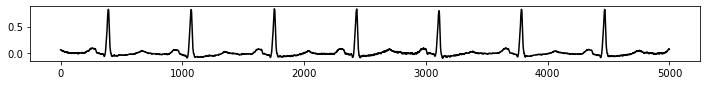

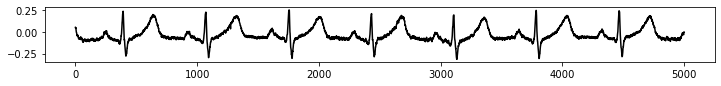

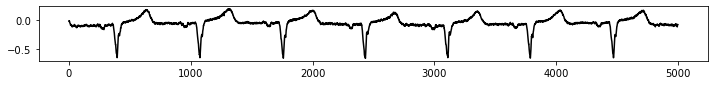

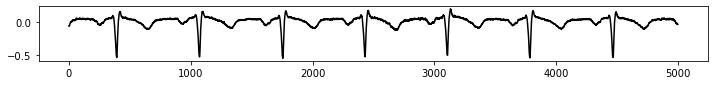

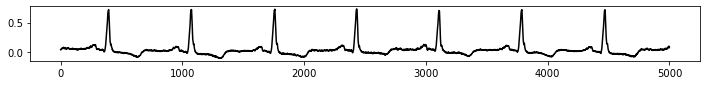

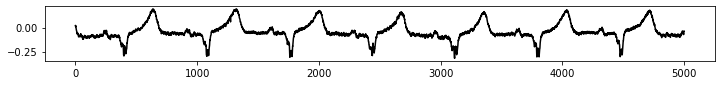

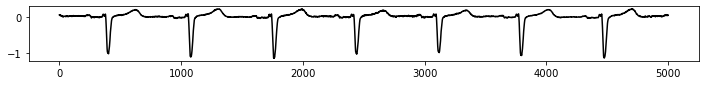

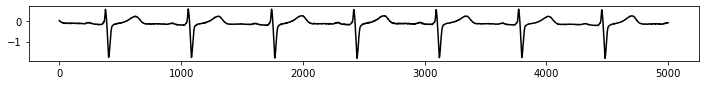

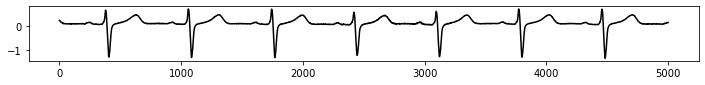

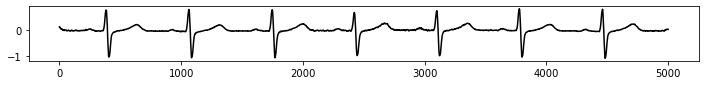

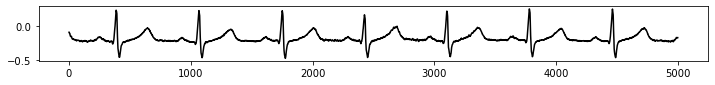

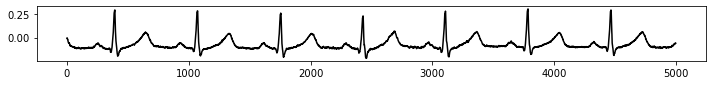

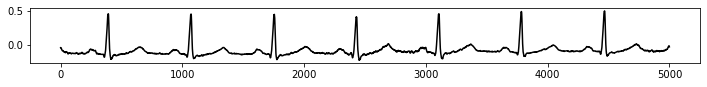

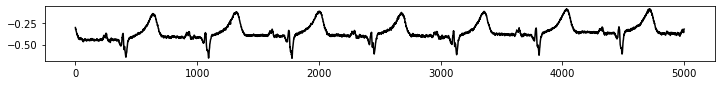

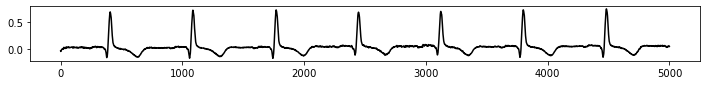

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 40', 'sex: male', 'ECG date: 28/01/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): inferior', 'Former infarction (localization): no', 'Additional diagnoses: Arterial hypertension, Hypercholesterinemia', 'Smoker: no', 'Number of coronary vessels involved: 2', 'Infarction date (acute): 23-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 30-Jan-91', 'Ventriculography: Hypokinesia antero-lateral wall', 'Chest X-ray: normal', 'Peripheral blood Pressure (syst/diast):  130/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast):   10/1 cmH2O', 'Pulmonary artery 

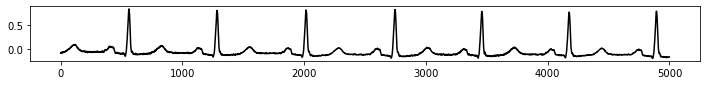

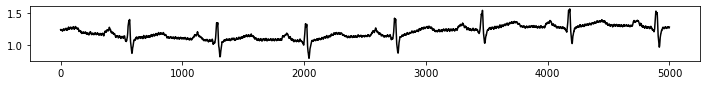

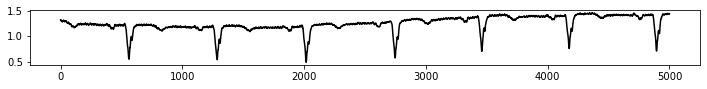

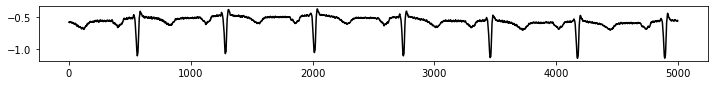

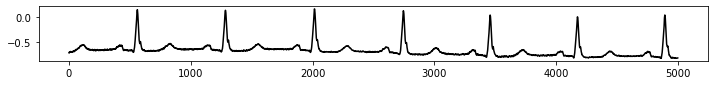

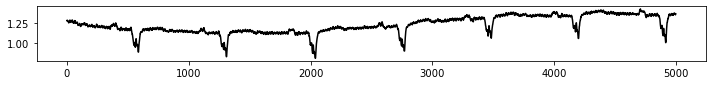

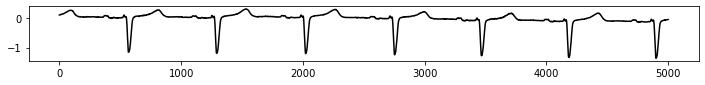

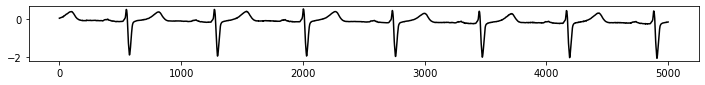

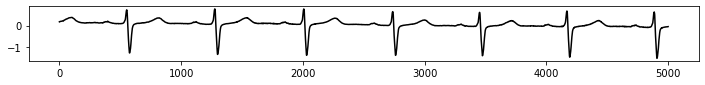

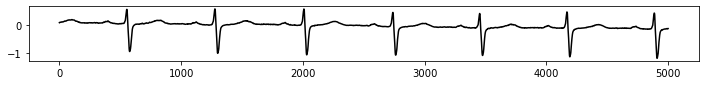

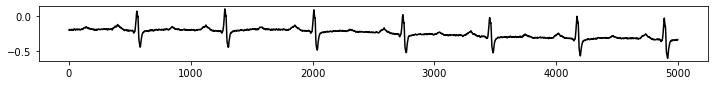

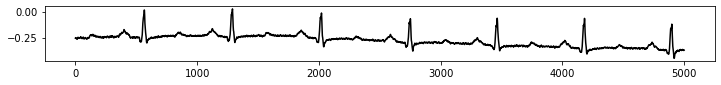

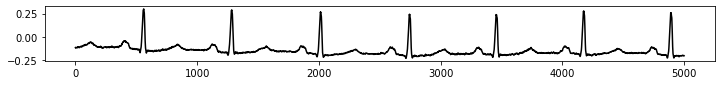

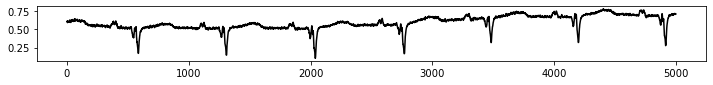

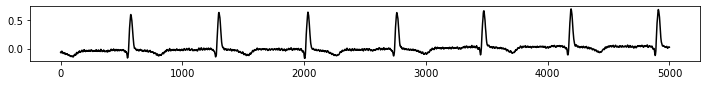

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 40', 'sex: male', 'ECG date: 04/02/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): inferior', 'Former infarction (localization): no', 'Additional diagnoses: Arterial hypertension, Hypercholesterinemia', 'Smoker: no', 'Number of coronary vessels involved: 2', 'Infarction date (acute): 23-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 30-Jan-91', 'Ventriculography: Hypokinesia antero-lateral wall', 'Chest X-ray: normal', 'Peripheral blood Pressure (syst/diast):  130/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast):   10/1 cmH2O', 'Pulmonary artery 

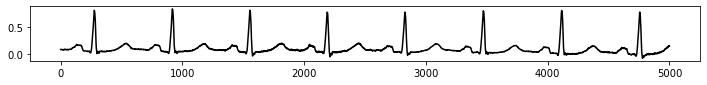

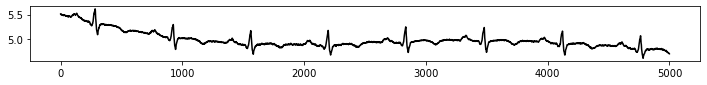

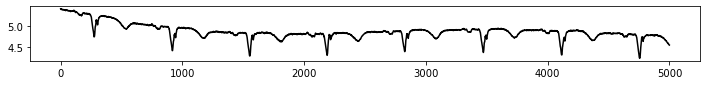

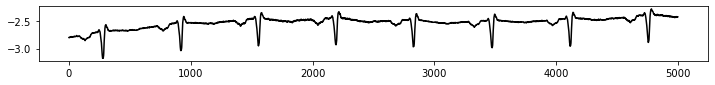

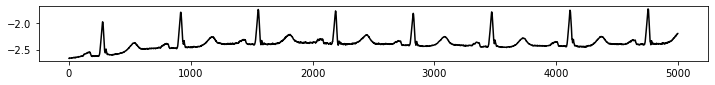

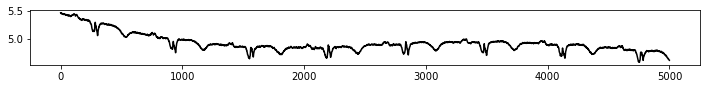

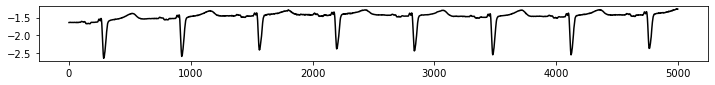

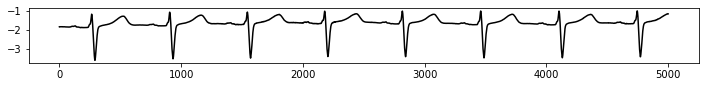

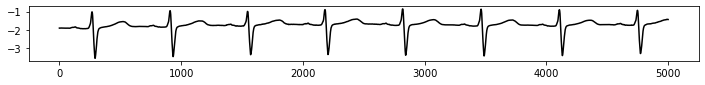

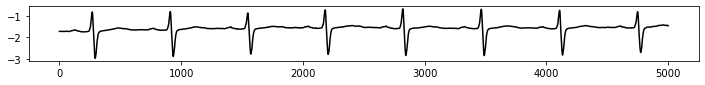

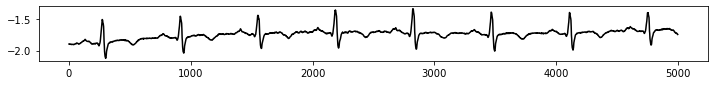

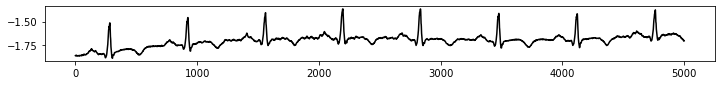

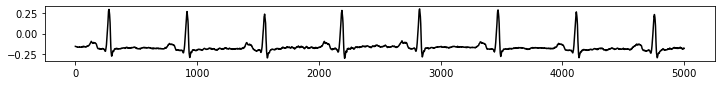

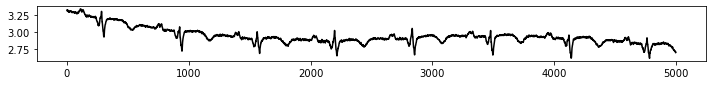

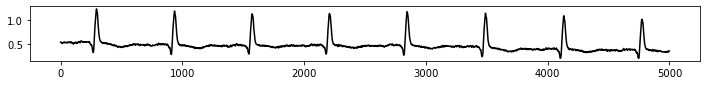

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 40', 'sex: male', 'ECG date: 27/03/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): inferior', 'Former infarction (localization): no', 'Additional diagnoses: Arterial hypertension, Hypercholesterinemia', 'Smoker: no', 'Number of coronary vessels involved: 2', 'Infarction date (acute): 23-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 30-Jan-91', 'Ventriculography: Hypokinesia antero-lateral wall', 'Chest X-ray: normal', 'Peripheral blood Pressure (syst/diast):  130/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast):   10/1 cmH2O', 'Pulmonary artery 

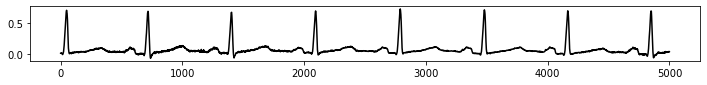

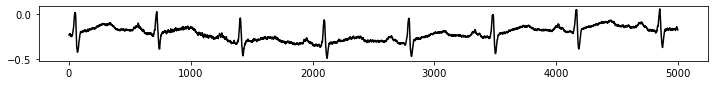

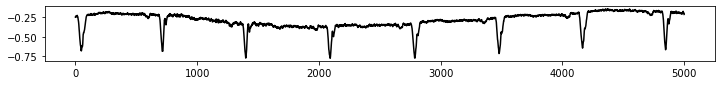

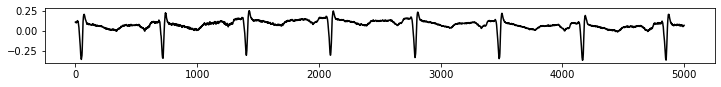

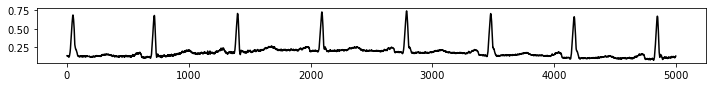

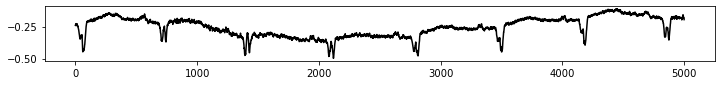

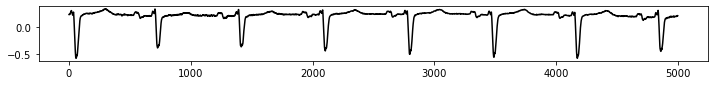

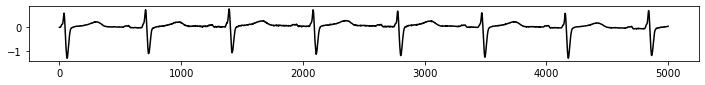

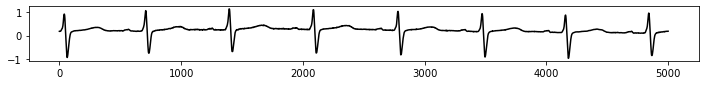

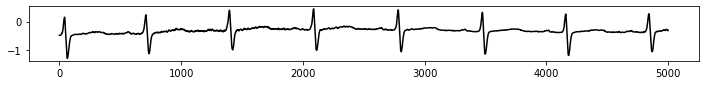

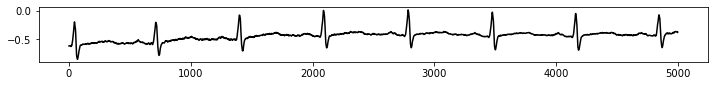

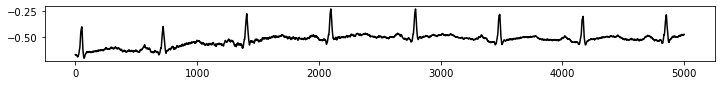

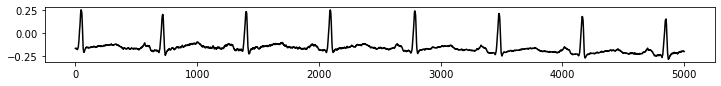

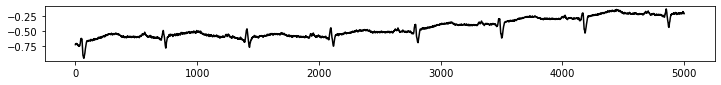

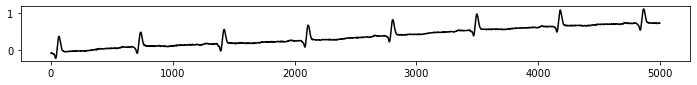

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 75', 'sex: male', 'ECG date: 24/01/1991', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): antero-septal', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: no', 'Number of coronary vessels involved: 3', 'Infarction date (acute): 23-Jan-91', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 31-Jan-91', 'Ventriculography: Hypokinesia/Akinesia antero-lateral wall and apex', 'Chest X-ray: normal', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast):   12/2 cmH2O', 'Pulmonary artery pressure (at rest)

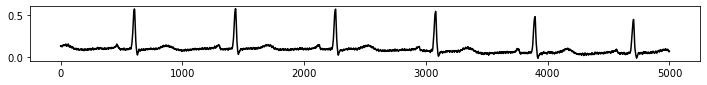

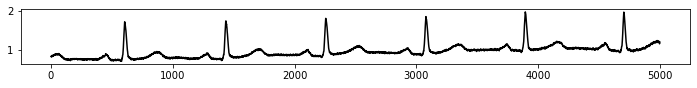

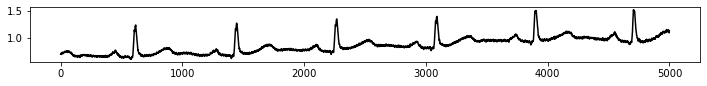

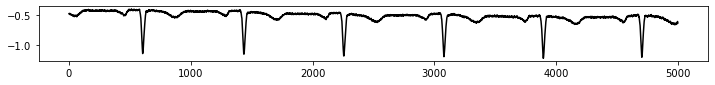

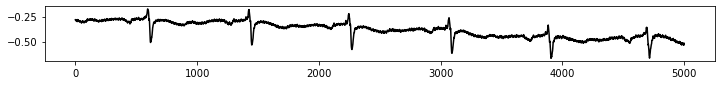

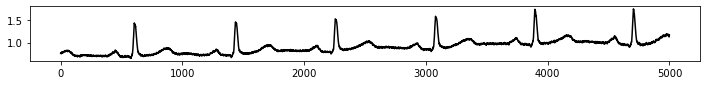

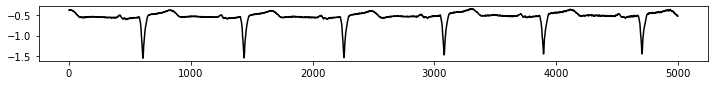

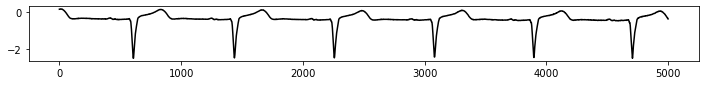

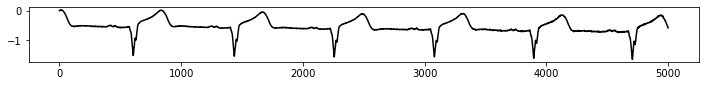

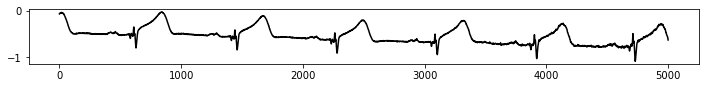

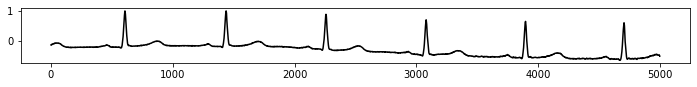

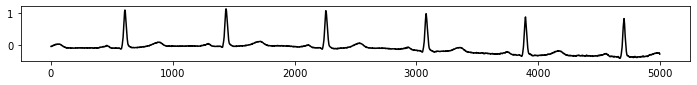

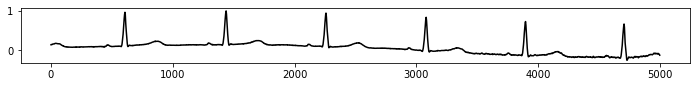

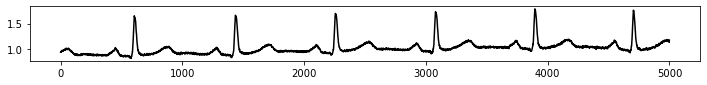

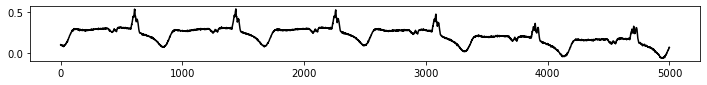

In [56]:
for record in records[100:110]:
    samp, labels = wfdb.rdsamp("../ecg/ptb-diagnostic-ecg-database-1.0.0/" + record, sampto=5000)

    print(labels)
    for c in range(samp.shape[1]):
        data = samp[:,c]
        plt.figure(figsize=(12, 1))
        plt.plot(np.arange(data.size), data, c="black")
        plt.show()
    
    

In [40]:
with open("../ecg/ptb-diagnostic-ecg-database-1.0.0/CONTROLS", "r") as f:
    controls = [x.replace("\n", "") for x in f.readlines()]

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 17', 'sex: male', 'ECG date: 16/06/1992', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (

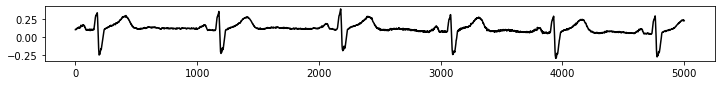

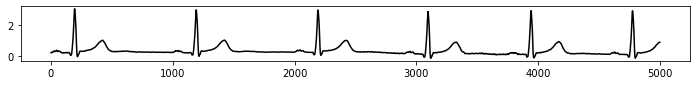

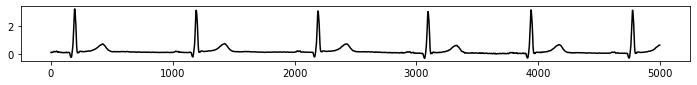

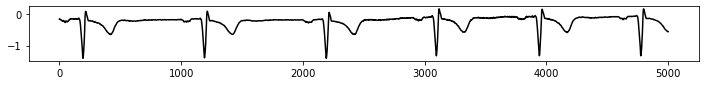

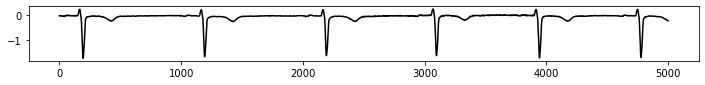

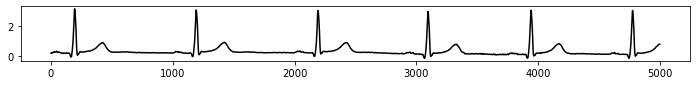

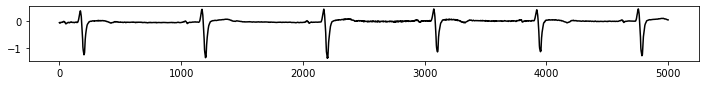

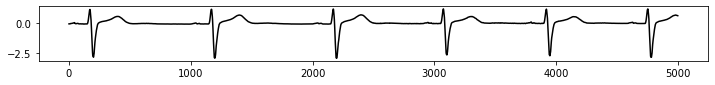

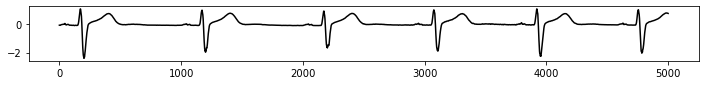

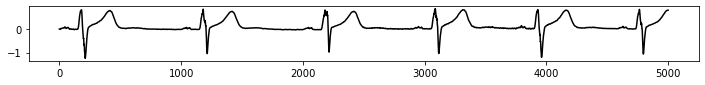

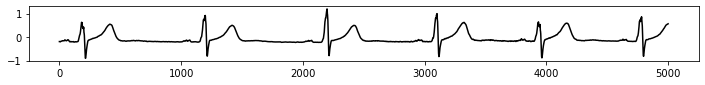

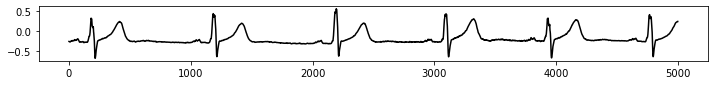

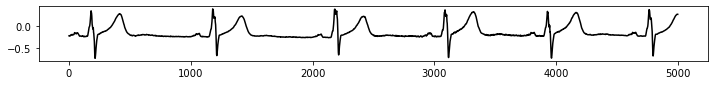

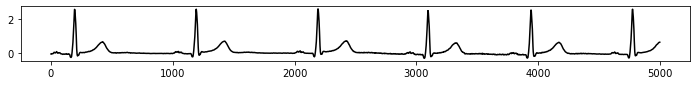

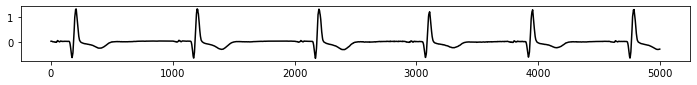

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 26', 'sex: male', 'ECG date: 14/08/1992', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (

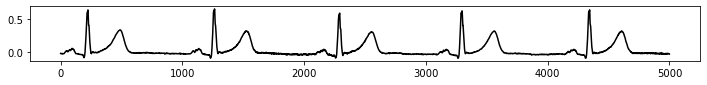

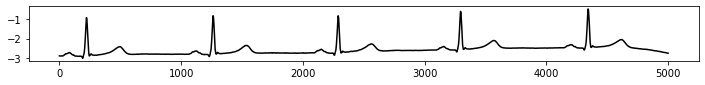

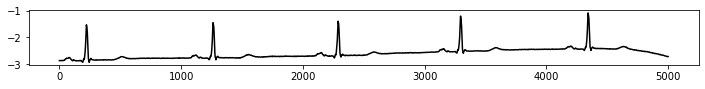

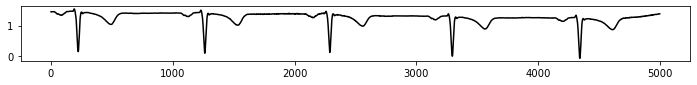

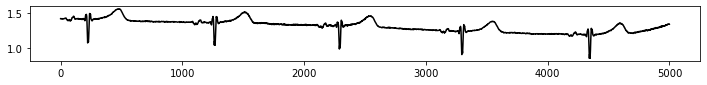

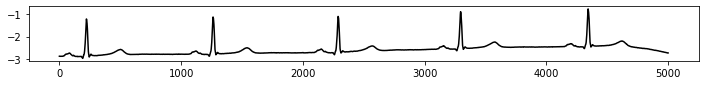

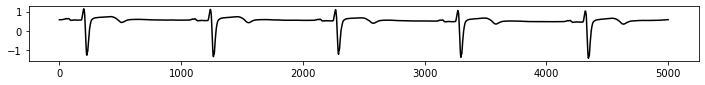

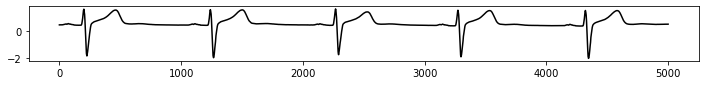

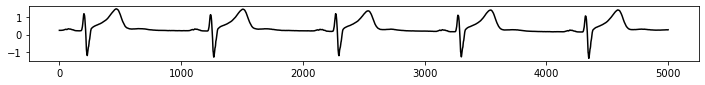

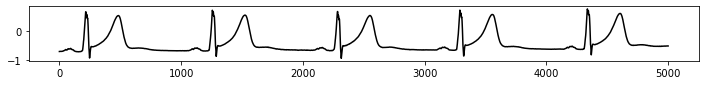

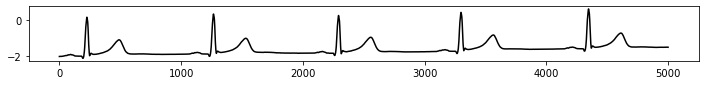

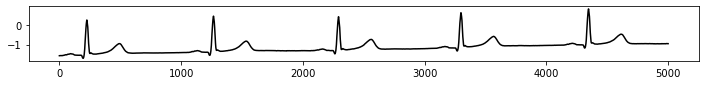

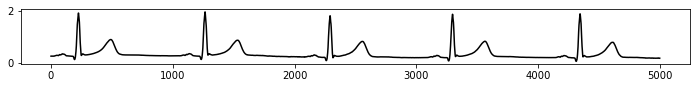

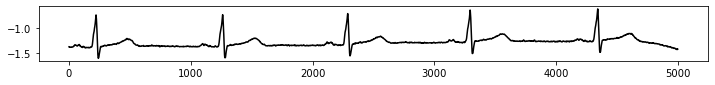

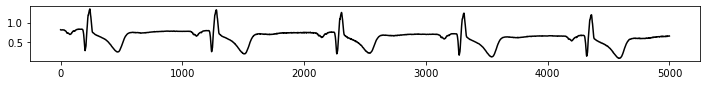

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 26', 'sex: male', 'ECG date: 14/08/1992', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (

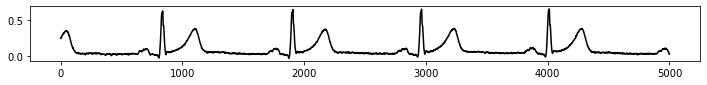

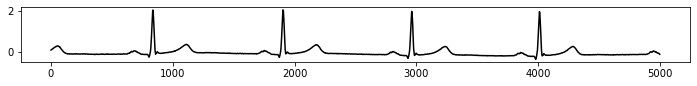

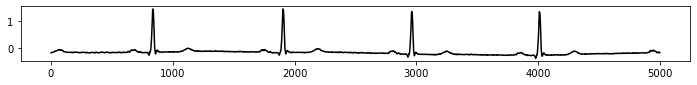

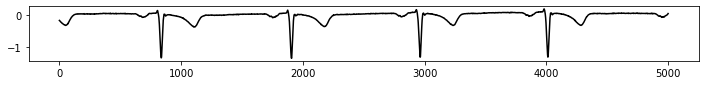

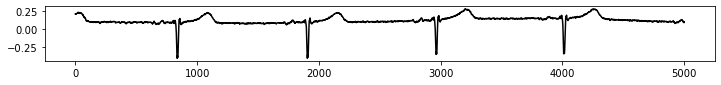

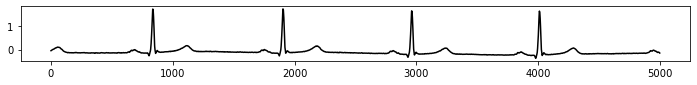

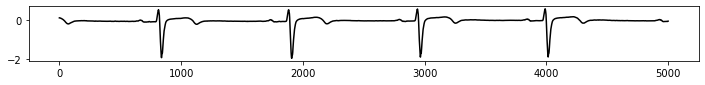

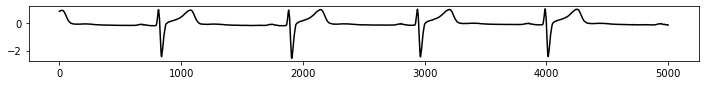

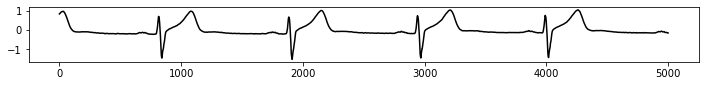

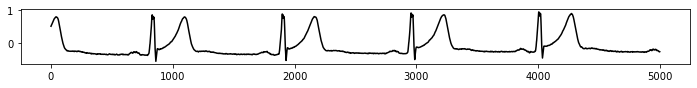

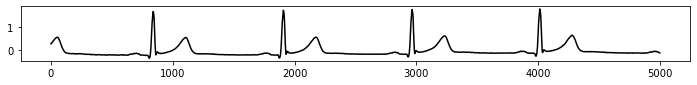

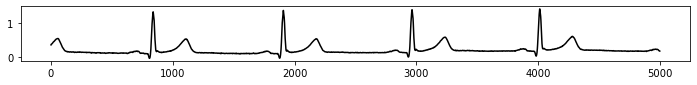

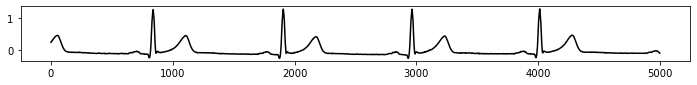

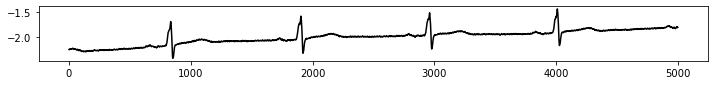

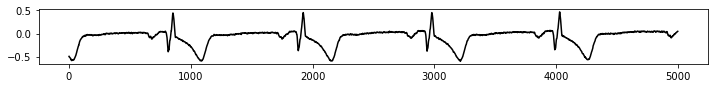

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: n/a', 'sex: male', 'ECG date: 23/03/1992', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output 

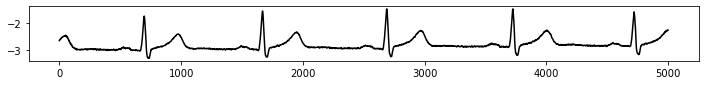

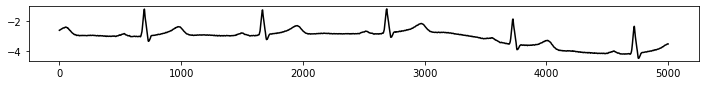

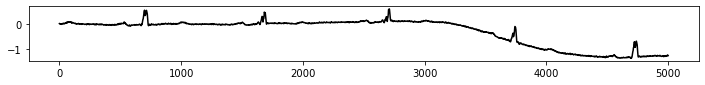

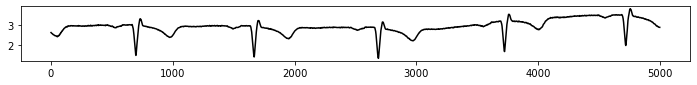

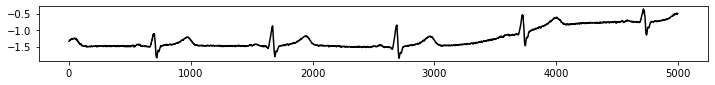

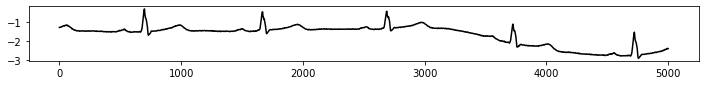

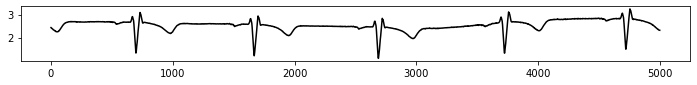

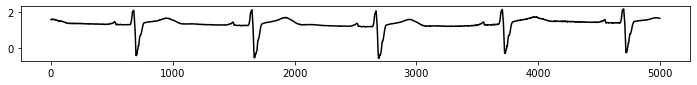

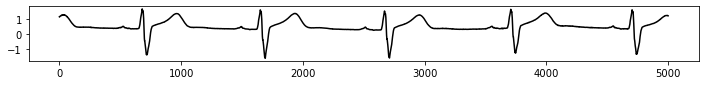

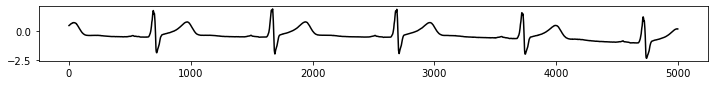

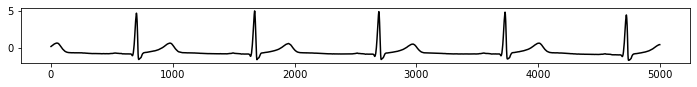

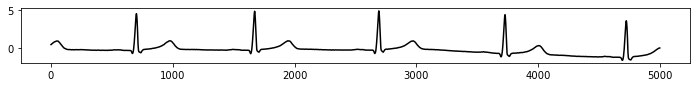

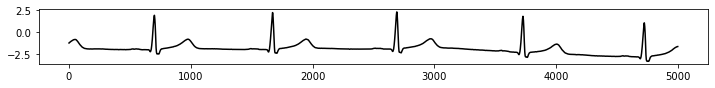

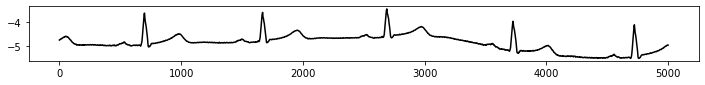

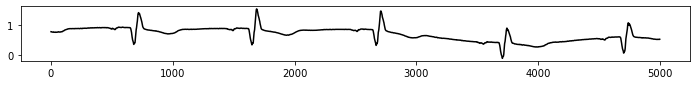

{'fs': 1000, 'sig_len': 5000, 'n_sig': 15, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'], 'comments': ['age: 54', 'sex: female', 'ECG date: 19/08/1992', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output

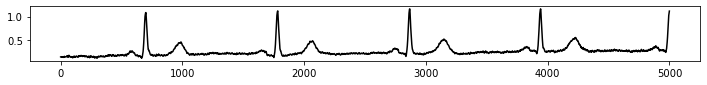

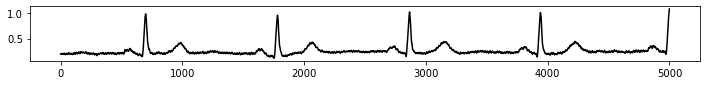

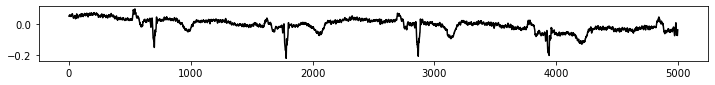

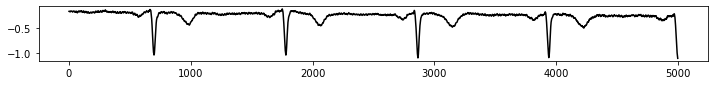

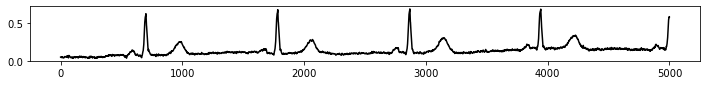

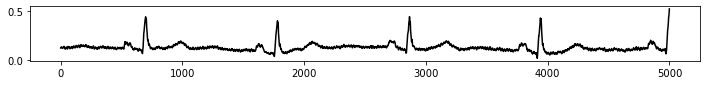

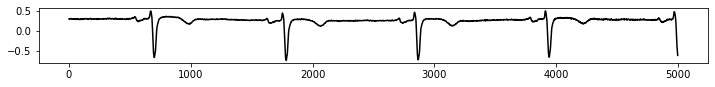

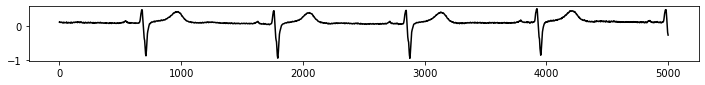

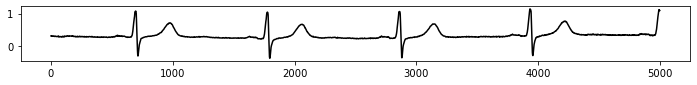

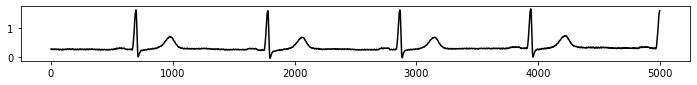

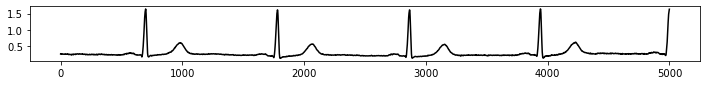

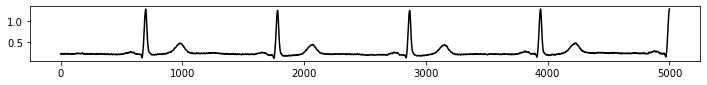

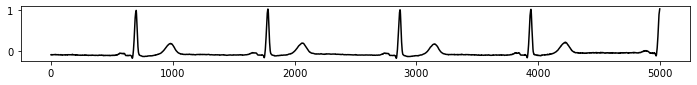

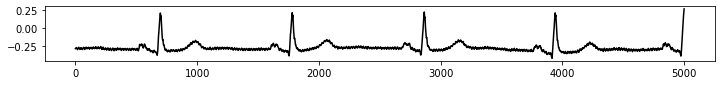

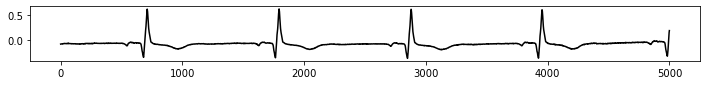

In [50]:
for control in controls[10:15]:
    samp, labels = wfdb.rdsamp("../ecg/ptb-diagnostic-ecg-database-1.0.0/" + control, sampto=5000)

    print(labels)
    for c in range(samp.shape[1]):
        data = samp[:,c]
        plt.figure(figsize=(12, 1))
        plt.plot(np.arange(data.size), data, c="black")
        plt.show()
    
    